In [1]:
from spso2006 import Spso
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Eggholder function

In [2]:
nbRepet = 20
n = 20
nbEpoch=120
acceptableFitness = -959.6407


In [3]:
data_k_i = []
for n in [5,10,20,30]:
    for k in [2,3,4,5]:
        for i in range(nbRepet):
            pso = Spso(n,k=k,nbEvaluationMax=nbEpoch,acceptableFitness=acceptableFitness)
            pso.mainLoop()
            fit = pso.epochSummary['fitness']
            topo = pso.epochSummary['topology']
            indivs = pso.epochSummary['bestX']
            for epoch in range(len(fit)):
                x = indivs[epoch]
                data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['x'],x['y'],x['z'],x['a'],x['b']])
    k = 10000
    for i in range(nbRepet):
        pso = Spso(n,k=k,nbEvaluationMax=nbEpoch,wl=0,wg=1,acceptableFitness=acceptableFitness)
        pso.mainLoop()
        fit = pso.epochSummary['fitness']
        indivs = pso.epochSummary['bestX']
        for epoch in range(len(fit)):
            x = indivs[epoch]
            data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['x'],x['y'],x['z'],x['a'],x['b']])
        


In [4]:
data =pd.DataFrame(data_k_i,columns=['n','k','i','epoch','f','topo','x','y','z','a','b'])


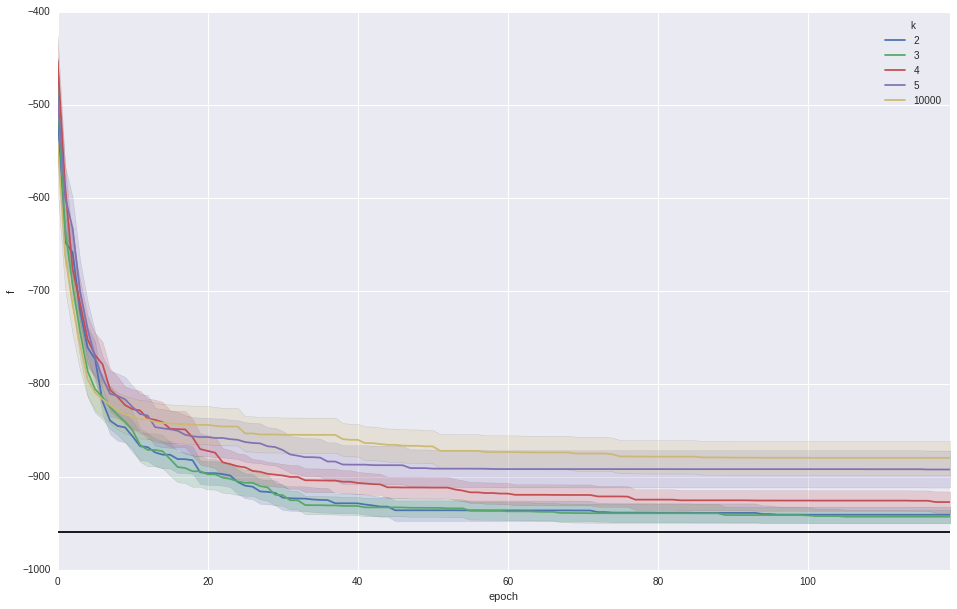

In [5]:
plt.figure(figsize=(16,10))
sns.tsplot(time='epoch',value='f',unit='i',condition='k',data=data[data.n==20])
plt.hlines(acceptableFitness,0,nbEpoch)